# Machine Learning - Arvore de Decisão

#### Importação das bibliotecas necessárias

In [1]:
# export_graphviz é usado para exportar a árvore de decisão para o formato DOT,
# o que permite visualizá-la graficamente.
from sklearn.tree import export_graphviz
# load_iris é uma função para carregar o conjunto de dados Iris, um dataset clássico
# usado para exemplos de classificação.
from sklearn.datasets import load_iris
# tree é o módulo da scikit-learn que contém implementações de algoritmos de árvores de decisão.
from sklearn import tree
# numpy é uma biblioteca para computação numérica em Python, amplamente utilizada
# para trabalhar com arrays e matrizes.
import numpy as np
# pandas é uma biblioteca para manipulação e análise de dados,
# especialmente útil para trabalhar com DataFrames.
import pandas as pd

#### Carregando a base de dados iris

In [2]:
iris = load_iris()

#### Verificando a descrição do dataset

In [3]:
# Imprime a descrição completa do conjunto de dados Iris, incluindo informações sobre os atributos,
# classes e características gerais do dataset.
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

#### Verificando features names, target e dados

In [4]:
# Exibe os nomes das features (atributos) do dataset Iris, como 'sepal length (cm)'.
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# Exibe os nomes das classes alvo (espécies de íris) no dataset, como 'setosa'.
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
# Exibe os dados das features (atributos) do dataset Iris, que são as medidas das flores.
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

#### Dividindo os dados em treino e teste

In [7]:
# train_test_split é uma função para dividir arrays ou matrizes em subconjuntos aleatórios de treino e teste.
from sklearn.model_selection import train_test_split

In [8]:
# Divide o conjunto de dados Iris em subconjuntos de treinamento e teste.
# iris.data são as features (atributos das flores).
# iris.target são os rótulos (espécies das flores).
# test_size=0.3 significa que 30% dos dados serão usados para teste e 70% para treinamento.
# X_train e y_train contêm as features e rótulos para o conjunto de treinamento.
# X_test e y_test contêm as features e rótulos para o conjunto de teste.
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.3)

#### Verificando a forma dos dados

In [9]:
# Retorna as dimensões (linhas, colunas) dos conjuntos de treinamento e teste,
# o que é útil para verificar se a divisão dos dados foi feita corretamente.
X_train.shape,X_test.shape

((105, 4), (45, 4))

In [10]:
# Retorna as dimensões (linhas, colunas) dos conjuntos de rótulos de treinamento e teste,
# o que é útil para verificar se a divisão dos dados foi feita corretamente.
y_train.shape,y_test.shape

((105,), (45,))

#### Instânciando o objeto classificador

In [11]:
# clf agora é uma instância da classe DecisionTreeClassifier, pronta para ser treinada.
clf = tree.DecisionTreeClassifier()

#### Parâmetros do  classificador DecisionTreeClassifier
* criterion: medida de qualidade da divisão
* splitter: estratégia utilizada para dividir o nó de decisão
* max_depth: profundidade máxima da árvore
* min_samples_split: número de amostras mínimas para considerar um nó para divisão
* min_samples_leaf: número de amostras mínimas no nível folha


#### Treinando o modelo de arvore de decisão

In [12]:
# Treina o classificador de árvore de decisão usando os dados de treinamento (features e rótulos).
clf = clf.fit(X_train,y_train)

#### Verificando as features mais importantes para o modelo de arvore de decisão treinado

In [13]:
# Exibe a importância de cada feature (atributo) para o modelo de árvore de decisão,
# indicando quais features foram mais relevantes na tomada de decisões.
clf.feature_importances_

array([0.        , 0.02155172, 0.92139959, 0.05704868])

In [14]:
# Itera sobre os nomes das features e suas importâncias, exibindo cada par.
for feature,importancia in zip(iris.feature_names,clf.feature_importances_):
    print("{}:{}".format(feature, importancia))

sepal length (cm):0.0
sepal width (cm):0.02155172413793104
petal length (cm):0.9213995943204869
petal width (cm):0.05704868154158218


#### Executando o algoritmo de arvore de decisão com o conjunto de teste

In [15]:
# Realiza previsões nos dados de teste (X_test) usando o classificador treinado (clf).
# O resultado são as classes previstas para cada amostra no conjunto de teste.
resultado = clf.predict(X_test)
# Exibe o array de resultados, que contém as previsões do modelo.
resultado

array([0, 2, 0, 2, 2, 1, 0, 1, 1, 0, 2, 0, 1, 0, 1, 2, 1, 0, 1, 0, 2, 0,
       0, 0, 1, 2, 1, 0, 2, 1, 2, 1, 1, 1, 2, 0, 1, 2, 0, 2, 1, 1, 1, 0,
       0])

#### Testando com uma nova amostra

In [16]:
# Cria um novo array numpy com uma única amostra de dados para teste.
# Esta amostra representa uma nova flor de íris com quatro características (sepal length, sepal width, petal length, petal width).
test = np.array([[5.1,3.5,1.4,0.2]])
# Usa o classificador treinado (clf) para prever a espécie da íris com base na nova amostra de teste.
# O método predict retornará a classe (0, 1 ou 2) que o modelo atribui a esta flor.
clf.predict(test)

array([0])

#### Verificando a probabilidade

In [17]:
# Retorna a probabilidade de cada classe para a amostra de teste.
# O resultado é um array onde cada elemento representa a probabilidade da amostra
# pertencer a cada uma das classes disponíveis (setosa, versicolor, virginica).
clf.predict_proba(test)

array([[1., 0., 0.]])

#### Métricas de Validação

In [18]:
# Importa o módulo metrics da biblioteca sklearn, que contém funções para avaliação de modelos.
from sklearn import metrics
# Imprime um relatório de classificação detalhado, que inclui precisão, recall, f1-score
# e suporte para cada classe.
# y_test são os rótulos verdadeiros do conjunto de teste.
# resultado são os rótulos previstos pelo modelo para o conjunto de teste.
# target_names são os nomes das classes (espécies de íris) para melhor legibilidade do relatório.
print(metrics.classification_report(y_test,resultado,target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.89      0.94        19
   virginica       0.83      1.00      0.91        10

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



#### Biblioteca para utilização de widgets interativos

In [19]:
# Instala a biblioteca ipywidgets, que é usada para criar elementos de interface de usuário interativos em notebooks Jupyter.
%pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
# Instala a biblioteca pydot, que é uma interface Python para o Graphviz.
# É frequentemente usada para criar representações gráficas de árvores de decisão.
# Juntamente com export_graphviz e graphviz (instalado no próximo passo),
# permite visualizar a estrutura da árvore de decisão.
!pip3 install pydot


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
# Instala a biblioteca graphviz, que é uma ferramenta de código aberto para visualização de gráficos.
# É essencial para renderizar as árvores de decisão exportadas pelo export_graphviz em um formato visual.
!pip3 install graphviz


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Importando as bibliotecas instaladas

In [22]:
import pydot
import graphviz 
from ipywidgets import interactive

#### Visualizando de forma gráfica a arvore gerada

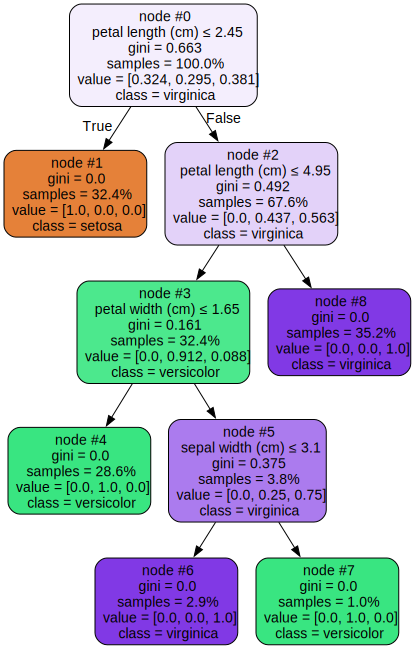

In [24]:
# Exporta a árvore de decisão para o formato DOT.
# Este formato é uma representação textual da árvore que pode ser renderizada por ferramentas como o Graphviz.
dot_data = tree.export_graphviz(
                 clf, # O classificador de árvore de decisão treinado.
                 out_file=None, # Indica que a saída será uma string, não um arquivo.
                 feature_names=iris.feature_names, # Nomes das features para rotular os nós.
                 class_names=iris.target_names,  # Nomes das classes alvo para rotular os nós folha.
                 filled=True, # Preenche os nós com cores para indicar a classe majoritária.
                 rounded=True, # Arredonda as bordas dos nós.
                 proportion=True, # Exibe a proporção de amostras em cada nó.
                 node_ids=True, # Exibe os IDs dos nós.
                 rotate=False, # Não rotaciona a árvore (vertical).
                 label='all', # Inclui todos os detalhes nos rótulos dos nós.
                 special_characters=True # Lida com caracteres especiais nos rótulos.
                )
# Cria um objeto Source do Graphviz a partir dos dados DOT gerados.
# Este objeto pode ser renderizado para exibir a árvore graficamente.
graph = graphviz.Source(dot_data)
graph

#### Bibliotecas necessárias para renderização da arvore de forma interativa

In [30]:
# interactive é uma função do ipywidgets usada para criar controles interativos no notebook.
from ipywidgets import interactive
# SVG é uma classe para exibir dados SVG (Scalable Vector Graphics) no notebook.
# display é uma função para exibir objetos no IPython/Jupyter.
from IPython.display import SVG,display
# Source é uma classe da biblioteca graphviz usada para renderizar gráficos a partir de uma string DOT.
from graphviz import Source

#### Renderizando a arvore de forma interativa através da manipulação de parametros

In [27]:
# Carrega novamente o conjunto de dados Iris.
data = load_iris()

# Atribui os dados das features (atributos) à variável X.
X = data.data

# Atribui os rótulos (classes alvo) à variável y.
y = data.target

# Atribui os nomes das features à variável features_label.
features_label = data.feature_names

# Atribui os nomes das classes alvo à variável class_label.
class_label = data.target_names

# Define uma função para plotar a árvore de decisão de forma interativa.
# Esta função recebe vários parâmetros que correspondem aos hiperparâmetros do classificador DecisionTreeClassifier.
def plot_tree(crit, split, depth, min_split, min_leaf=0.2):
    # Instancia o classificador DecisionTreeClassifier com os parâmetros fornecidos pelos widgets interativos.
    estimator = tree.DecisionTreeClassifier(
           random_state = 0 # Define uma semente para reprodutibilidade dos resultados.
          ,criterion = crit # Critério de qualidade da divisão ('gini' ou 'entropy').
          ,splitter = split # Estratégia de divisão ('best' ou 'random').
          ,max_depth = depth # Profundidade máxima da árvore.
          ,min_samples_split=min_split # Número mínimo de amostras para dividir um nó.
          ,min_samples_leaf=min_leaf # Número mínimo de amostras que um nó folha deve ter.
    )

    # Treina o modelo com os dados completos (X) e os rótulos (y) do dataset Iris.
    estimator.fit(X, y)
    # Exporta a árvore de decisão treinada para o formato DOT como uma string.
    # Inclui nomes das features, nomes das classes e formatação para melhor visualização.
    graph = Source(tree.export_graphviz(estimator
      , out_file=None # Indica que a saída é uma string.
      , feature_names=features_label # Nomes das features para os nós.
      , class_names=class_label # Nomes das classes para os nós folha.
      , filled = True)) # Preenche os nós com cores baseadas na classe.
    # Exibe a árvore de decisão renderizada como um SVG (Scalable Vector Graphics) no notebook.
    display(SVG(graph.pipe(format='svg')))
    # Retorna o estimador treinado.
    return estimator

# Cria os controles interativos usando a função `interactive`.
# Cada parâmetro da função `plot_tree` é mapeado para um tipo de widget (Dropdown para opções, Slider para intervalos).
inter=interactive(plot_tree
   , crit = ["gini", "entropy"] # Dropdown para o critério.
   , split = ["best", "random"] # Dropdown para o splitter.
   , depth=[1,2,3,4,5] # Dropdown para a profundidade máxima.
   , min_split=(0.1,1) # Slider para o mínimo de amostras para split.
   , min_leaf=(0.1,0.5)) # Slider para o mínimo de amostras por folha.

# Exibe os widgets interativos no notebook.
display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

#### Navegando na estrutura de uma arvore de decisão

In [28]:
iris = load_iris()
# Atribui os dados das features (atributos) do dataset Iris à variável X.
# Estes são os dados de entrada que o modelo usará para aprender.
X = iris.data
# Atribui os rótulos ou classes alvo do dataset Iris à variável y.
# Estes são os resultados que o modelo tentará prever.
y = iris.target
# Divide os conjuntos de dados (X) e rótulos (y) em subconjuntos de treinamento e teste.
# random_state=0 garante que a divisão seja a mesma a cada execução, para reprodutibilidade.
# X_train e y_train são usados para treinar o modelo, enquanto X_test e y_test são usados para avaliá-lo.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [32]:
# Instancia um objeto DecisionTreeClassifier.
# max_leaf_nodes=3 limita o número máximo de nós folha na árvore a 3, o que simplifica a árvore.
# random_state=0 define uma semente para o gerador de números aleatórios, garantindo que os resultados sejam reprodutíveis.
estimator = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
# Treina o modelo de árvore de decisão usando os dados de treinamento (features X_train e rótulos y_train).
estimator.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,3
,min_impurity_decrease,0.0
,class_weight,None


In [33]:
# Obtém o número total de nós na árvore de decisão.
n_nodes = estimator.tree_.node_count
# Obtém os IDs dos filhos esquerdos de cada nó. Um valor de -1 indica um nó folha.
children_left = estimator.tree_.children_left
# Obtém os IDs dos filhos direitos de cada nó. Um valor de -1 indica um nó folha.
children_right = estimator.tree_.children_right
# Obtém o índice da feature usada para dividir em cada nó. Um valor de -2 indica um nó folha.
feature = estimator.tree_.feature
# Obtém o valor de limiar usado para dividir em cada nó. Um valor de -2 indica um nó folha.
threshold = estimator.tree_.threshold

In [34]:
print("Número de nós: {}".format(n_nodes))
print("Indices a esquerda: {}".format(children_left))
print("Indices a direita: {}".format(children_right))
print("Feature: {}".format(feature))
print("Limite (threshold: {}".format(threshold))

Número de nós: 5
Indices a esquerda: [ 1 -1  3 -1 -1]
Indices a direita: [ 2 -1  4 -1 -1]
Feature: [ 3 -2  2 -2 -2]
Limite (threshold: [ 0.80000001 -2.          4.95000005 -2.         -2.        ]


In [36]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64) # Array para armazenar a profundidade de cada nó.
is_leaves = np.zeros(shape=n_nodes, dtype=bool)     # Array booleano para identificar se um nó é folha.
stack = [(0, -1)]                                   # Inicializa a pilha para a travessia: (node_id, parent_depth).
                                                    # Começa com o nó raiz (0) e profundidade do pai -1.
while len(stack) > 0:                               # Enquanto houver nós na pilha para processar (travessia em profundidade).
    node_id, parent_depth = stack.pop()             # Retira o nó atual e a profundidade do seu pai da pilha.
    node_depth[node_id] = parent_depth + 1          # Define a profundidade do nó atual.

    # Verifica se o nó atual não é um nó folha (ou seja, possui filhos esquerdo e direito diferentes).
    if (children_left[node_id] != children_right[node_id]):
        # Se for um nó interno, adiciona seus filhos à pilha para processamento posterior,
        # incrementando a profundidade para cada filho.
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True                   # Se o nó não tiver filhos (é um nó folha), marca-o como tal.

print("\nA arvore binária tem %s nós e a seguinte estrutura: \n"
      % n_nodes)                                    # Imprime o número total de nós na árvore.
for i in range(n_nodes):                            # Itera por todos os nós para imprimir sua estrutura.
    if is_leaves[i]:                                # Se o nó atual for um nó folha.
        # Imprime o nó folha, recuado pela sua profundidade.
        print("%snó=%s (nó folha)." % (node_depth[i] * "\t", i))
    else:
        # Se for um nó interno (nó de teste), imprime a condição de divisão.
        print("%snó=%s (nó teste): vai para o nó %s se o valor do atributo %s <= %s \n se não, vai para o "
              "nó %s."
              % (node_depth[i] * "\t",                  # Recuo baseado na profundidade do nó.
                 i,                                      # ID do nó atual.
                 children_left[i],                       # ID do nó filho esquerdo.
                 iris.feature_names[feature[i]],         # Nome da feature usada para a divisão.
                 threshold[i],                           # Valor limite para a divisão.
                 children_right[i],                      # ID do nó filho direito.
                 ))


A arvore binária tem 5 nós e a seguinte estrutura: 

nó=0 (nó teste): vai para o nó 1 se o valor do atributo petal width (cm) <= 0.800000011920929 
 se não, vai para o nó 2.
	nó=1 (nó folha).
	nó=2 (nó teste): vai para o nó 3 se o valor do atributo petal length (cm) <= 4.950000047683716 
 se não, vai para o nó 4.
		nó=3 (nó folha).
		nó=4 (nó folha).


#### Extraindo regras da arvore gerada a partir de uma determinada amostra do conjunto de teste X_teste